In [1]:
import pandas as pd
import numpy as np

In [43]:
house_data=pd.read_csv("kc_house_data.csv")
house_train_data=pd.read_csv("kc_house_train_data.csv")

In [4]:
house_data.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
from sklearn.linear_model import LinearRegression

In [23]:
from sklearn.model_selection import train_test_split




In [12]:
house_data.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

In [10]:
from matplotlib import pyplot as plt
from matplotlib import style

In [11]:
import statsmodels


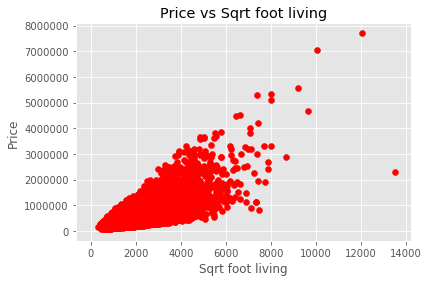

In [44]:
style.use('ggplot')
fig = plt.figure()
plot = fig.add_subplot(111)

# create some curves
for i in range(4):
    plot.plot(
        [i*1,i*2,i*3,i*4],
        gid=i)

def on_plot_hover(event):
    for curve in plot.get_lines():
        if curve.contains(event)[0]:
            print "over %s" % curve.get_gid()

#fig.canvas.mpl_connect('motion_notify_event', on_plot_hover) 

plt.scatter(house_train_data.sqft_living,house_train_data.price,color='r')#,align='center')
plt.xlabel("Sqrt foot living")
plt.ylabel("Price")
plt.title("Price vs Sqrt foot living")
fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)#
plt.show()

In [26]:
x_train,x_test,y_train,y_test=train_test_split(house_data.sqft_living,house_data.price,test_size=0.33,random_state=42)

In [31]:
y_train.shape

(14480,)

In [45]:
lm=LinearRegression()

x_train_sq=house_train_data.sqft_living
y_train_sq=house_train_data.price

In [46]:
lm.fit(x_train_sq[:,None],y_train_sq)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
x_train[:,None]

array([[2600],
       [2140],
       [1730],
       ..., 
       [2120],
       [ 380],
       [3130]])

In [34]:
type(x_train)

pandas.core.series.Series

In [36]:
x_train.k

(14480,)

In [47]:
lm.coef_

array([ 281.95883963])

In [52]:
lm.intercept_

-47116.079072893714

In [53]:
def calculator(x):
    return (lm.intercept_ + lm.coef_*x)

In [54]:
print calculator(2650)

[ 700074.84594751]


In [59]:
def residual_sum_sq(y_train_sq):
    sum=0
    for i in range(0,len(y_train_sq)):
        sum+=((y_train_sq[i]-calculator(x_train_sq[i]))**2)
    return sum

In [60]:
print residual_sum_sq(y_train_sq)

[  1.20191835e+15]


In [61]:
def inverse_calculator(x):
    return (x-lm.intercept_)/lm.coef_

In [62]:
print inverse_calculator(800000)

[ 3004.39624515]


In [63]:
######Linear Regression with bed room as feature#################

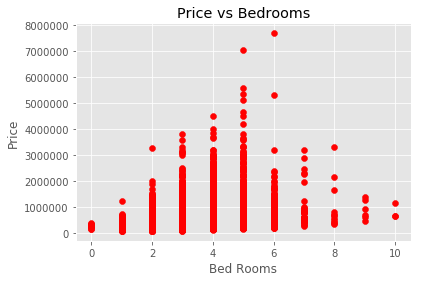

In [67]:
plt.scatter(house_train_data.bedrooms,house_train_data.price,color='r')#,align='center')
plt.xlabel("Bed Rooms")
plt.ylabel("Price")
plt.title("Price vs Bedrooms")
#fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)#
plt.show()

In [68]:
x_train,x_test,y_train,y_test=train_test_split(house_data.bedrooms,house_data.price,test_size=0.33,random_state=42)

In [69]:
lm=LinearRegression()

x_train_sq=house_train_data.bedrooms
y_train_sq=house_train_data.price

In [70]:
lm.fit(x_train_sq[:,None],y_train_sq)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
print residual_sum_sq(y_train_sq)

[  2.14324450e+15]
